# Đề bài
Buổi tối, Anh và Tân thích cùng nhau ngắm bầu trời đêm đầy sao.Họ sẽ ngồi dưới đất, nhâm nhi một chút trà và nhìn chằm chằm vào những ngôi sao sáng trên bầu trời. Trong tầm mắt của họ, có một cái cây hình nón rất cao ngăn tầm nhìn ra làm hai phần, vì vậy họ coi cái cây như một dấu mốc: Các ngôi sao của Anh ở bên phải của cây và các ngôi sao của Tân ở bên trái. Mỗi đêm, Anh rất thích đếm các vì sao của mình, vì vậy cậu ấy biết chính xác rằng có n ngôi sao ở phía của mình (giả sử rằng số ngôi sao không đổi). Gần đây, cậu ấy muốn thử một cái gì đó mới. Cậu ta tưởng tượng ra một hệ tọa độ: cậu đặt gốc của hệ tọa độ tại giao điểm của mặt đất và cây, trục Ox dọc theo mặt đất ở bên trái cây và trục Oy hướng lên trên cây (xem hình minh họa)
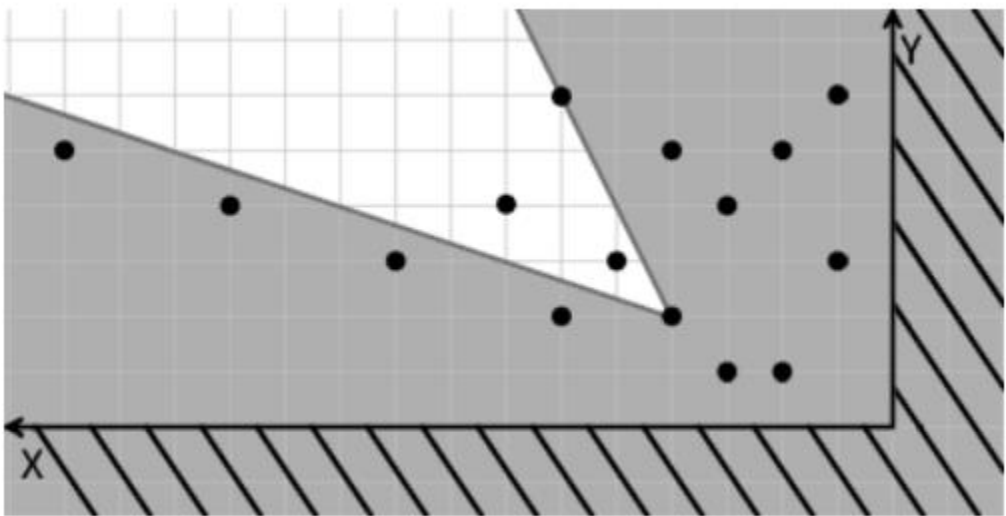

Để làm cho mọi thứ trở nên thú vị hơn, Anh tưởng tượng ra hai tia phát ra từ gốc tọa độ với các góc $\alpha_1$ và $\alpha_2$ với trục Ox

Bây giờ cậu chọn bất kỳ ngôi sao nào nằm giữa các tia sáng này. Lưu ý rằng cậu không thể chọn những ngôi sao nằm trên tia sáng. Sau đó, cậu tưởng tượng ra hai tia nữa phát ra từ ngôi sao này ở cùng góc $\alpha_1$ và $\alpha_2$ với trục Ox và chọn một ngôi sao khác nằm hoàn toàn ở giữa các tia mới. Cậu ta lặp lại hành động này cho đến khi nào vẫn còn có thể chọn một ngôi sao nằm giữa các tia phát ra từ ngôi sao đã chọn trước đó.
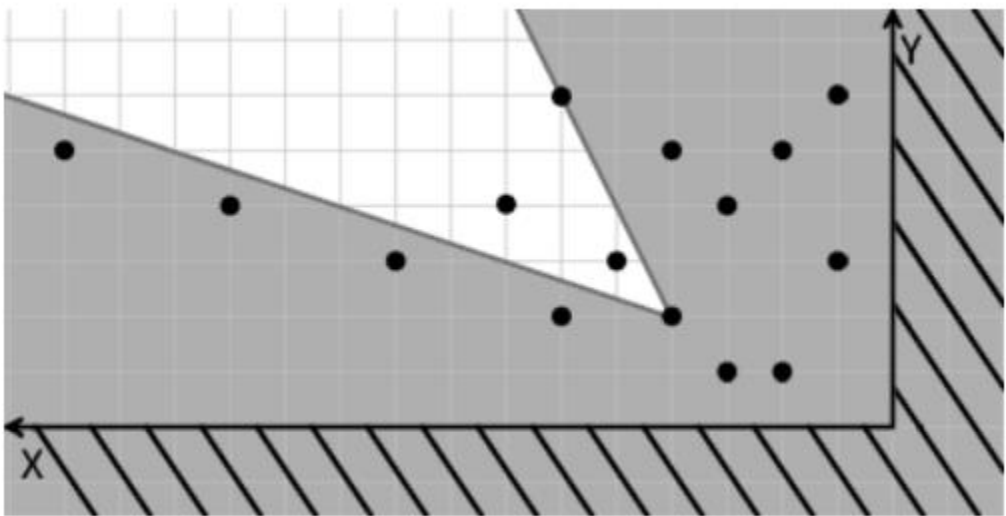

Kết quả là Anh được một chuỗi sao. Tìm số sao m tối đa mà chuỗi của Anh có thể chứa. Lưu ý rằng chuỗi phải bắt đầu từ điểm gốc của hệ tọa độ; điểm này không được tính khi đếm số m ngôi sao trong chuỗi

# Tóm tắt

Tìm ra một chuỗi sao, sao cho độ dài chuỗi sao dài nhất có thể khi tịnh tiến 2 cục toạ độ tầm nhìn qua các điểm (sao)

# Nhận dạng

Ta cần áp dụng một số tính chất của toán hình học để thỏa mãn một số tính chất của góc và quy bài toán về tìm dãy con lớn nhất

# Thiết kế thuật toán
**_Input:_**
- Dòng đầu tiên: Một số integer n ($1\le n \le10^5$) - Số ngôi sao
- Dòng thứ hai: 2 phân số đơn giản thể hiện mối quan hệ "a/b c/d", sao cho $\frac{a}{b} = \frac{sin({\alpha}_{1})}{cos({\alpha}_{1})}$, $\frac{c}{d} = \frac{sin({\alpha}_{2})}{cos({\alpha}_{2})}$
- n dòng tiếp theo: cặp số integer $x_i, y_i(1 \le x_i , y_i \le 10^5)$ - Tọa độ các ngôi sao, biết rằng mọi ngôi sao có tọa độ khác nhau.

**_Output:_**
- Số sao lớn nhất mà chuỗi của Jerry có thể chứa.

**Ý TƯỞNG**
- Tính góc ${\alpha}_{1}$ = $arctan(\frac{a}{b})$.
- Rõ ràng ta có được phương trình 1: xoay trục $Ox$ 1 góc ${\alpha}_{1}$ với ${\alpha}_{1}$ = $arctan(\frac{a}{b})$ => vậy là ta có đường 1 tạm gọi là $L1$: y = $tan({\alpha}_{1})x$.
- Lập phương trình $L$: y = $tan({\alpha}_{2} $−$ {\alpha}_{1})x$ [hoặc có thể thử $L$: y = $tan({\alpha}_{1})x$ hoặc y = $tan({\alpha}_{2})x$ if u feel aventurous] rồi ta thế $O(x_i, y_i)$ vô 2 phương trình thì các điểm $(x, y)$ nằm trên $L$ dưới $L1$ là điểm không cần thiết => có thể loại bỏ các điểm rác.
- Có 2 cách từ đây:
    * Xét khoảng các Euclid tất cả các điểm tới điểm đang xét.
    * Cho phương trình $L$ chạy trên trục $x$ sao cho các điểm sao đi qua $L$.
        * Khi tịnh tiến trên phương trình $L$ thì ta có 2 phần phần $y$ và $y'$ với $y$.
        * Khi đó ta xắp xếp lại các toạ độ theo thứ tự $y'$ tăng dần.
        * Bài toán từ đây trở thành bài toán tìm dãy con tăng dần lớn nhất.
        
# Cài đặt

In [1]:
import math

def lis(arr, n):
    temp_list = [1 for x in range(0,n)]
    i,j = 1,0
    while i<len(arr) and j<len(arr):
        if arr[j][1]<arr[i][1]:
            if temp_list[j]+1>temp_list[i]:
                temp_list[i] = temp_list[j]+1
        j=j+1
        if j==i:
            j,i=0,i+1
    return max(temp_list)

def line_function(x, y, angle):
    return y - math.tan(angle)*x

def translating(x, y, angle):
    k = y/math.tan(angle) - x
    return math.tan(angle)*k

m = int(input())
x, y = (input().split())
alpha1 = math.atan(eval(x))
alpha2 = math.atan(eval(y))
alpha3 = alpha2 - alpha1
coordinates = [] 
for i in range(0,m):
    x, y = (input().split())
    if line_function(float(x), float(y), alpha1) < 0:
        continue
    if line_function(float(x), float(y), alpha2) > 0:
        continue
    y_ = translating(float(x), float(y), alpha2 - alpha1)
    coordinates.append((float(x), float(y), y_))

coordinates.sort(key=lambda tup: tup[2], reverse=True)
final = lis(coordinates, m)

print(final)

15
1/4 2/1
3 1
6 2
9 3
12 4
15 5
2 1
4 2
5 3
7 4
1 3
3 4
2 5
4 5
1 6
6 6
5
